# **Multivariate Climate Data Clustering using K-Means and Hierarchical Models**
Here we are dealing with climate data that comprises spatial information, time information, and scientific values. The dataset contains the value of 7 parameters for a region of 41 longitudes and 41 latitudes for 365 days in a year. 

Our goal is to create meaningful clusters of 365 days based on the values of these 7 parameters. We have used the K-Means and Hierarchical clustering algorithms to generate the clustering results.  

In [ ]:
! pip install netCDF4

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.2/5.2 MB 12.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 12.8 MB/s eta 0:00:00


In [ ]:
#import netCDF4
import netCDF4 as nc
import pandas as pd
import numpy as np
import xarray as xr
import datetime
import datetime as dt
from netCDF4 import date2num,num2date
from math import sqrt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# **2. Data preparation**
The dataset has some NaN values in the SST variable. To replace these NaN values we used the mean value of the full dataset. The function returns 2 NumPy arrays one with size (365, 11767) and another with size (365, 41, 41, 7). The array with size (365, 11767) is used to calculate the silhouette score and the array with size (365, 41, 41, 7) is used to train the model.

In [ ]:
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler

def data_preprocessing(data_path):
  rdata_daily = xr.open_dataset(data_path)    # data_path = '/content/drive/MyDrive/ERA5_Dataset.nc'
  rdata_daily_np_array = np.array(rdata_daily.to_array())   # the shape of the dailt data is (7, 365, 41, 41)
  rdata_daily_np_array_T = rdata_daily_np_array.transpose(1,0,2,3)   # transform the dailt data from (7, 365, 41, 41) to (365, 7, 41, 41)
  overall_mean = np.nanmean(rdata_daily_np_array_T[:, :, :, :])
  for i in range(rdata_daily_np_array_T.shape[0]):
    for j in range(rdata_daily_np_array_T.shape[1]):
      for k in range(rdata_daily_np_array_T.shape[2]):
        for l in range(rdata_daily_np_array_T.shape[3]):
          if np.isnan(rdata_daily_np_array_T[i, j, k, l]):
            #print("NAN data in ", i, j, k, l)
            rdata_daily_np_array_T[i, j, k, l] = overall_mean 
  rdata_daily_np_array_T_R = rdata_daily_np_array_T.reshape((rdata_daily_np_array_T.shape[0], -1))  # transform the dailt data from (365, 7, 41, 41) to (365, 11767)
  min_max_scaler = preprocessing.MinMaxScaler() # calling the function
  rdata_daily_np_array_T_R_nor = min_max_scaler.fit_transform(rdata_daily_np_array_T_R)   # now normalize the data, otherwise the loss will be very big 
  rdata_daily_np_array_T_R_nor = np.float32(rdata_daily_np_array_T_R_nor)    # convert the data type to float32, otherwise the loass will be out-of-limit 
  return rdata_daily_np_array_T_R_nor


In [ ]:
data_nor_eval = data_preprocessing('/content/drive/MyDrive/ERA5_Dataset.nc')

In [ ]:
data_nor_eval.shape

(365, 11767)

In [ ]:
from sklearn.metrics import silhouette_samples, silhouette_score
def silhouette_score(X, labels, *, metric="cosine", sample_size=None, random_state=None, **kwds):  
 return np.mean(silhouette_samples(X, labels, metric=metric, **kwds))

# **3. K-Means Algorithm**
Here we apply the K-Means algorithm on the normalized dataset with the size (365, 11767). For our dataset, we have used the number of clusters as 7.

In [ ]:
from sklearn.cluster import KMeans

n_clusters =7
kmeans = KMeans(n_clusters=n_clusters)
result = kmeans.fit_predict(data_nor_eval)
result

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([5, 6, 6, 6, 6, 1, 1, 5, 5, 5, 5, 3, 5, 3, 3, 5, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 1, 1, 5, 5, 5, 3, 3, 3, 3, 3, 3,
       1, 1, 5, 5, 3, 1, 1, 3, 3, 1, 5, 5, 5, 5, 5, 5, 3, 3, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 3, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 3,
       1, 5, 5, 5, 6, 6, 6, 6, 6, 3, 5, 6, 6, 6, 3, 3, 5, 3, 3, 3, 3, 3,
       3, 1, 1, 1, 5, 5, 5, 5, 5, 5, 3, 3, 5, 5, 3, 3, 3, 3, 5, 5, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 2, 2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 4, 4, 4, 2, 2, 2, 2, 2, 2, 2, 2, 4, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 0, 4, 4,
       4, 0, 0, 0, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 0, 0, 0, 0, 4, 4, 4, 4, 0, 0, 0, 0, 0, 4, 4, 0, 0, 0, 0,
       0, 0, 4, 0, 0, 4, 4, 4, 4, 0, 0, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 0, 0, 0, 4, 4, 4, 4, 4, 4, 4, 4, 0, 0, 0, 4, 4, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 4, 4, 4, 4, 4, 4, 0, 0, 0,

In [ ]:
silhouette_avg_rdata_daily = silhouette_score(data_nor_eval, result)   
print("The average silhouette_score is :", silhouette_avg_rdata_daily)

The average silhouette_score is : 0.25403228955532015


In [ ]:
from sklearn.metrics import davies_bouldin_score 

print("Davies-Bouldin score is ", davies_bouldin_score(data_nor_eval, result))

Davies-Bouldin score is  1.6867802277405655


# **4. Plotting the clustering results:**
To plot the clustering results we used the dimension reduction algorithm to reduce data dimension.

Text(0, 0.5, 'Feature-2')

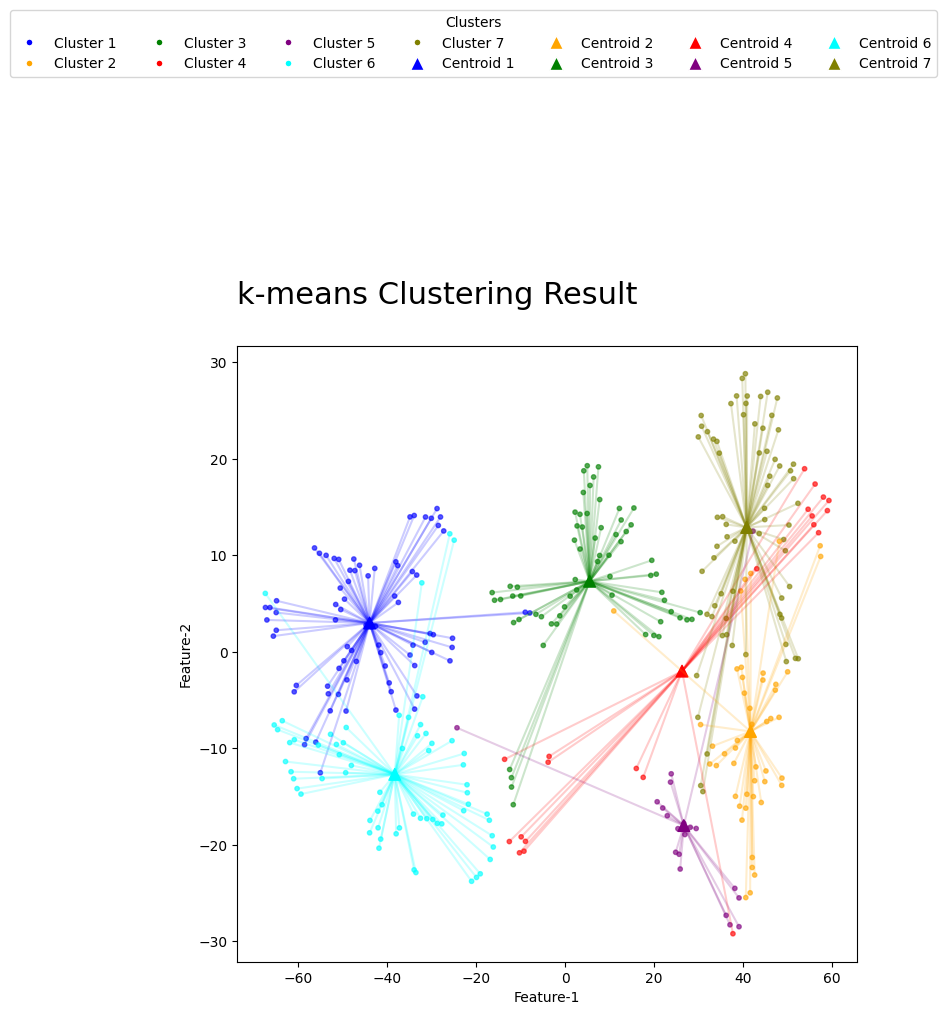

In [ ]:
from matplotlib.lines import Line2D
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

tsne = TSNE(n_components=2, learning_rate='auto', perplexity=10)
tsne_data = tsne.fit_transform(data_nor_eval)

tsne_df = pd.DataFrame(tsne_data, columns=['TSNE1','TSNE2'])
tsne_df['cluster'] = pd.Categorical(result)

Clusters = {}
Cluster_Centers = {}
for i in set(result):
    Clusters['Cluster' + str(i)] = np.array(tsne_df[tsne_df.cluster == i].drop(columns=['cluster']))
for i in range(len(Clusters)):
    Cluster_Centers[i] = np.mean(Clusters['Cluster' + str(i)],axis=0)

cen_x = [Cluster_Centers[i][0] for i in range(7)] 
cen_y = [Cluster_Centers[i][1] for i in range(7)]


tsne_df['cen_x'] = tsne_df.cluster.map({0:Cluster_Centers[0][0], 1:Cluster_Centers[1][0], 2:Cluster_Centers[2][0],
                                        3:Cluster_Centers[3][0], 4:Cluster_Centers[4][0], 5:Cluster_Centers[5][0],
                                        6:Cluster_Centers[6][0]})
tsne_df['cen_y'] = tsne_df.cluster.map({0:Cluster_Centers[0][1], 1:Cluster_Centers[1][1], 2:Cluster_Centers[2][1],
                                        3:Cluster_Centers[3][1], 4:Cluster_Centers[4][1], 5:Cluster_Centers[5][1],
                                        6:Cluster_Centers[6][1]})

colors = ['blue', 'orange', 'green', 'red', 'purple', 'cyan', 'olive']
tsne_df['c'] = tsne_df.cluster.map({0:colors[0], 1:colors[1], 2:colors[2], 3:colors[3], 4:colors[4], 5:colors[5], 6:colors[6]})

fig, ax = plt.subplots(1, figsize=(8,8))
# plot data
plt.scatter(tsne_df.TSNE1, tsne_df.TSNE2, c=tsne_df.c, alpha = 0.6, s=10,)
# plot centroids
plt.scatter(cen_x, cen_y, marker='^', c=colors, s=70)
# plot lines
for idx, val in tsne_df.iterrows():
    x = [val.TSNE1, val.cen_x,]
    y = [val.TSNE2, val.cen_y]
    plt.plot(x, y, c=val.c, alpha=0.2)
# legend
legend_elements = [Line2D([0], [0], marker='o', color='w', label='Cluster {}'.format(i+1), 
                   markerfacecolor=mcolor, markersize=10) for i, mcolor in enumerate(colors)]
legend_elements.extend([Line2D([0], [0], marker='^', color='w', label='Centroid {}'.format(i+1), 
            markerfacecolor=mcolor, markersize=10) for i, mcolor in enumerate(colors)])

plt.legend(handles=legend_elements, title='Clusters', bbox_to_anchor=(1, 1.3), loc='upper right', ncol=7, borderaxespad=0)

plt.title('k-means Clustering Result\n', loc='left', fontsize=22)
plt.xlabel('Feature-1')
plt.ylabel('Feature-2')

# **5. Evaluation:**
To compute the RMSE, variance, and average inter cluster distance we have to use the xarray format of our real data and the clustering result.

In [ ]:
def total_rmse(data_path,formed_clusters):
  processed_data = data_preprocessing(data_path)
  trans_data = pd.DataFrame(processed_data)
  trans_data['Cluster'] = formed_clusters

  # Normalized
  # Function that creates two dictionaries that hold all the clusters and cluster centers
  def nor_get_clusters_and_centers(input,formed_clusters):
    Clusters = {}
    Cluster_Centers = {}
    for i in set(formed_clusters):
      Clusters['Cluster' + str(i)] = np.array(input[input.Cluster == i].drop(columns=['Cluster']))
      Cluster_Centers['Cluster_Center' + str(i)] = np.mean(Clusters['Cluster' + str(i)],axis=0)
    return Clusters,Cluster_Centers

  intra_rmse = []
  sq_diff = []
  Clusters,Cluster_Centers = nor_get_clusters_and_centers(trans_data,formed_clusters)
  for i in range(len(Clusters)):
    for j in range(len(Clusters['Cluster' + str(i)])):
      diff = Clusters['Cluster' + str(i)][j] - Cluster_Centers['Cluster_Center' + str(i)]
      Sq_diff = (diff)**2
      sq_diff.append(Sq_diff)

  Sq_diff_sum = np.sum(np.sum(sq_diff))
  rmse = np.sqrt(Sq_diff_sum/data_nor_eval.shape[0])
  return rmse

In [ ]:
total_rmse('/content/data/ERA5_Dataset.nc', result)

13.663497533667142

### This cell measure the variances of the generated clusters.  

In [ ]:
trans_data = pd.DataFrame(data_nor_eval)
trans_data['Cluster'] = result
Clusters = {}
Cluster_Centers = {}
for i in set(result):
  Clusters['Cluster' + str(i)] = np.array(trans_data[trans_data.Cluster == i].drop(columns=['Cluster']))

variances = pd.DataFrame(columns=range(len(Clusters)),index=range(2))
for i in range(len(Clusters)):
    variances[i].iloc[0] = np.var(Clusters['Cluster' + str(i)])
    variances[i].iloc[1] = Clusters['Cluster' + str(i)].shape[0]

var_sum = 0
for i in range(7):
    var_sum = var_sum + (variances[i].iloc[0] * variances[i].iloc[1])

var_avg = var_sum/data_nor_eval.shape[0]
var_avg

0.045196636817485834

### The following cell measure the average inter cluster distance.  

In [ ]:
from scipy.spatial.distance import cdist,pdist

trans_data = pd.DataFrame(data_nor_eval)
trans_data['Cluster'] = result
Clusters = {}
Cluster_Centers = {}
for i in set(result):
  Clusters['Cluster' + str(i)] = np.array(trans_data[trans_data.Cluster == i].drop(columns=['Cluster']))

distance_matrix = pd.DataFrame(columns=range(len(Clusters)),index=range(len(Clusters)))
for i in range(len(Clusters)):
  for j in range(len(Clusters)):
    if i == j:
      #distance_matrix[i].iloc[j] = 0
      distance_intra = cdist(Clusters['Cluster' + str(i)], Clusters['Cluster' + str(j)], 'euclidean')
      distance_matrix[i].iloc[j] = np.max(distance_intra)
    elif i > j:
       continue
    else:
      distance = cdist(Clusters['Cluster' + str(i)], Clusters['Cluster' + str(j)], 'euclidean')
      distance_matrix[i].iloc[j] = np.min(distance)
      distance_matrix[j].iloc[i] = np.min(distance)

sum_min = 0
for i in range(n_clusters):
    sum_min = sum_min + np.min(distance_matrix[i])

avg_inter = sum_min/n_clusters
avg_inter

7.018959673987815

# **6. Hierarchical Clustering Algorithm**
Here we apply the hierarchical clustering algorithm on the normalized dataset with the size (365, 11767). For our dataset, we have used the number of clusters as 7.

In [ ]:
from sklearn.cluster import AgglomerativeClustering

cluster = AgglomerativeClustering(n_clusters=7, affinity='euclidean', linkage='ward')  
cluster.fit_predict(data_nor_eval)
cluster.labels_

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


array([0, 0, 0, 0, 0, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 5, 5, 5, 5, 0,
       0, 0, 0, 0, 5, 5, 5, 0, 0, 5, 3, 3, 2, 2, 0, 5, 5, 5, 5, 5, 5, 5,
       3, 3, 0, 0, 5, 3, 3, 5, 5, 3, 2, 0, 0, 0, 0, 0, 0, 5, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 3, 3, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 6, 6, 0, 0, 2, 6, 6, 6, 0, 2, 2, 6,
       0, 0, 0, 0, 0, 0, 0, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 1, 1, 4,
       1, 1, 1, 1, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 1, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 1, 4, 4, 4, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 4, 4, 4, 4, 4, 4, 1, 1, 1,

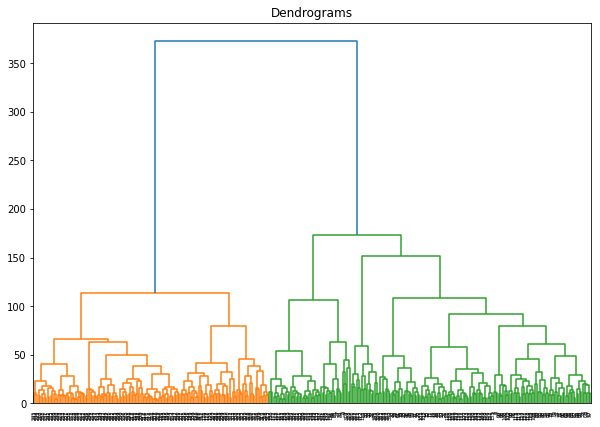

In [ ]:
import scipy.cluster.hierarchy as shc
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(10, 7))  
plt.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(data_nor_eval, method='ward'))

In [ ]:
result = cluster.labels_

In [ ]:
silhouette_avg_rdata_daily = silhouette_score(data_nor_eval, result)  # dataset 44x44x7 
print("The average silhouette_score is :", silhouette_avg_rdata_daily)

The average silhouette_score is : 0.23545716910366724


In [ ]:
from sklearn.metrics import davies_bouldin_score 

print("Davies-Bouldin score is ", davies_bouldin_score(data_nor_eval, result))

Davies-Bouldin score is  1.566951845789417


# **7. Evaluation:**
To compute the RMSE, variance, and average inter cluster distance we have to use the xarray format of our real data and the clustering result.

In [ ]:
def total_rmse(data_path,formed_clusters):
  processed_data = data_preprocessing(data_path)
  trans_data = pd.DataFrame(processed_data)
  trans_data['Cluster'] = formed_clusters

  # Normalized
  # Function that creates two dictionaries that hold all the clusters and cluster centers
  def nor_get_clusters_and_centers(input,formed_clusters):
    Clusters = {}
    Cluster_Centers = {}
    for i in set(formed_clusters):
      Clusters['Cluster' + str(i)] = np.array(input[input.Cluster == i].drop(columns=['Cluster']))
      Cluster_Centers['Cluster_Center' + str(i)] = np.mean(Clusters['Cluster' + str(i)],axis=0)
    return Clusters,Cluster_Centers

  intra_rmse = []
  sq_diff = []
  Clusters,Cluster_Centers = nor_get_clusters_and_centers(trans_data,formed_clusters)
  for i in range(len(Clusters)):
    for j in range(len(Clusters['Cluster' + str(i)])):
      diff = Clusters['Cluster' + str(i)][j] - Cluster_Centers['Cluster_Center' + str(i)]
      Sq_diff = (diff)**2
      sq_diff.append(Sq_diff)

  Sq_diff_sum = np.sum(np.sum(sq_diff))
  rmse = np.sqrt(Sq_diff_sum/data_nor_eval.shape[0])
  return rmse

In [ ]:
total_rmse('/content/data/ERA5_Dataset.nc', result)

13.98838681453113

### This cell measure the variances of the generated clusters.  

In [ ]:
trans_data = pd.DataFrame(data_nor_eval)
trans_data['Cluster'] = result
Clusters = {}
Cluster_Centers = {}
for i in set(result):
  Clusters['Cluster' + str(i)] = np.array(trans_data[trans_data.Cluster == i].drop(columns=['Cluster']))

variances = pd.DataFrame(columns=range(len(Clusters)),index=range(2))
for i in range(len(Clusters)):
    variances[i].iloc[0] = np.var(Clusters['Cluster' + str(i)])
    variances[i].iloc[1] = Clusters['Cluster' + str(i)].shape[0]

var_sum = 0
for i in range(7):
    var_sum = var_sum + (variances[i].iloc[0] * variances[i].iloc[1])

var_avg = var_sum/data_nor_eval.shape[0]
var_avg

0.04538593542973988

### The following cell measure the average inter cluster distance.  

In [ ]:
from scipy.spatial.distance import cdist,pdist

trans_data = pd.DataFrame(data_nor_eval)
trans_data['Cluster'] = result
Clusters = {}
Cluster_Centers = {}
for i in set(result):
  Clusters['Cluster' + str(i)] = np.array(trans_data[trans_data.Cluster == i].drop(columns=['Cluster']))

distance_matrix = pd.DataFrame(columns=range(len(Clusters)),index=range(len(Clusters)))
for i in range(len(Clusters)):
  for j in range(len(Clusters)):
    if i == j:
      #distance_matrix[i].iloc[j] = 0
      distance_intra = cdist(Clusters['Cluster' + str(i)], Clusters['Cluster' + str(j)], 'euclidean')
      distance_matrix[i].iloc[j] = np.max(distance_intra)
    elif i > j:
       continue
    else:
      distance = cdist(Clusters['Cluster' + str(i)], Clusters['Cluster' + str(j)], 'euclidean')
      distance_matrix[i].iloc[j] = np.min(distance)
      distance_matrix[j].iloc[i] = np.min(distance)

sum_min = 0
for i in range(n_clusters):
    sum_min = sum_min + np.min(distance_matrix[i])

avg_inter = sum_min/n_clusters
avg_inter

7.781009909578225